In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.datasets import make_moons

# K-Means

## Dataset 1

### Prepare dataset

In [ ]:
# Visualisasi make_moons menggunakan random sample data

X, y = make_moons(n_samples=500, noise=0.1)
df = pd.DataFrame(X,y)
df = df.rename(columns={0: "X1", 1: "X2"})
df.head()

,X1,X2
0,-0.395848,0.744642
1,1.335769,-0.508232
1,1.649721,-0.475778
1,0.468808,-0.265796
1,0.013604,0.448623


### Model Training

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter = 100, n_init = 1)
model.fit(X)

KMeans(max_iter=100, n_clusters=6, n_init=1)

### Model Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, labels=model.predict(X))

0.49651719044566495

### Cluster Visualization

In [ ]:
import matplotlib.pyplot as plt

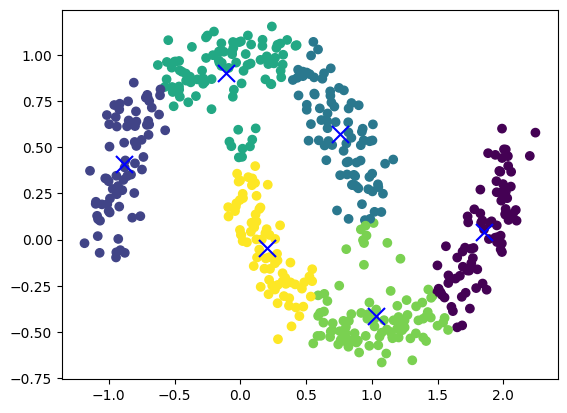

In [ ]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], marker='x', s=150, c='b')

### Find optimal k

#### Elbow Methods

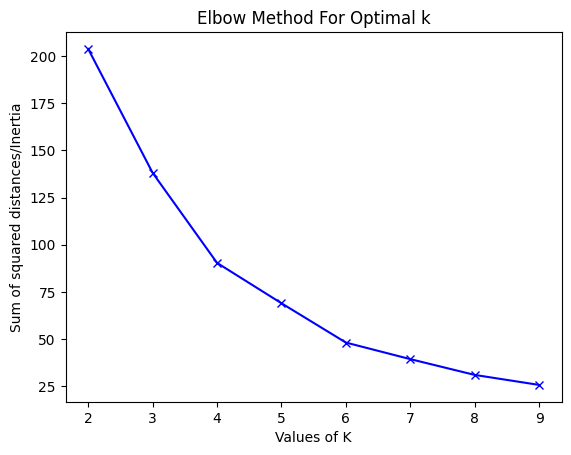

In [ ]:
# Ref: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
Sum_of_squared_distances = []
K = range(2,10)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K")
plt.ylabel("Sum of squared distances/Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

#### Silhoutte Score

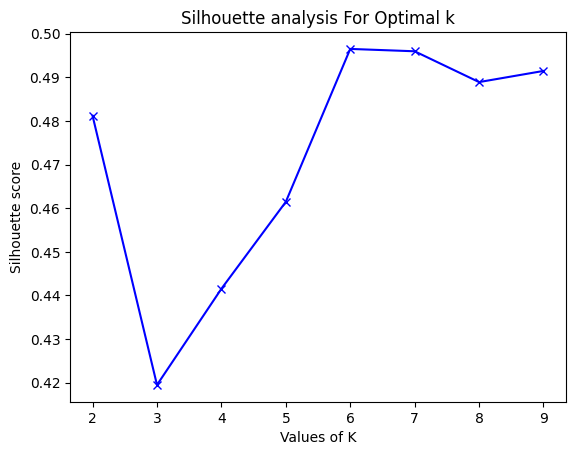

In [ ]:
# Ref https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
silhouette_avg = []
range_n_clusters = range(2,10)

for num_clusters in range_n_clusters:

  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

## Dataset 2

### Prepare dataset text

In [ ]:
df_train = pd.read_csv("train.csv")
df_valid = pd.read_csv("valid.csv")
df_test = pd.read_csv("test.csv")
df =  pd.concat([df_train, df_valid, df_test], ignore_index=True)
df

,id,text,label
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,436,Ibu pernah bekerja di grab indonesia,neutral
3,394,Paling suka banget makan siang di sini ayam sa...,positive
4,592,Pelayanan bus DAMRI sangat baik,positive
...,...,...,...
995,502,Saya sudah sering kali datang menikmati makana...,positive
996,268,Banyak orang yang kurang suka untuk berobat ke...,negative
997,282,"Pelayanan baik, tempat parkir cukup luas, kebu...",positive
998,407,"Demi apa pun tes cpns bikin macet, sialannnnnnn",negative


In [ ]:
df.label.value_counts()

negative    383
positive    378
neutral     239
Name: label, dtype: int64

### Text Normalization / Cleansing

In [ ]:
import nltk
import numpy as np
nltk.download("stopwords")
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
list_stopwords = stopwords_scratch.words('indonesian')
list_stopwords_en = stopwords_scratch.words('english')
list_stopwords.extend(list_stopwords_en)
list_stopwords.extend(["ya","yg","ga","yuk","dah"])
stopwords = list_stopwords
stopwords[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

### Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_preprocessed = df.text.to_list()

# Proses Feature Extraction
vectorizer = TfidfVectorizer(stop_words=stopwords)

X = vectorizer.fit_transform(data_preprocessed)
print("Feature Extraction selesai")

Feature Extraction selesai


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
tfidf_array = X.toarray()
df_array = pd.DataFrame(data=tfidf_array,columns = vectorizer.get_feature_names_out())
print(df_array)

      00  000        10  100  10000  101   11        12  120   13  ...  \
0    0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.298054  0.0  0.0  ...   
1    0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   
2    0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   
3    0.0  0.0  0.152039  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   
4    0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   
..   ...  ...       ...  ...    ...  ...  ...       ...  ...  ...  ...   
995  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   
996  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   
997  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   
998  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   
999  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.000000  0.0  0.0  ...   

     yooyee  youtube  yummi  yummy  yun  yup  yuummy    zaman  zan  zebra  
0       0.0      0.0    0.0    0.0 

### Model Training

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter = 100, n_init = 1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

Cluster 0:
 orang
 banget
 marah
 pagi
 bikin
 pelayanan
 macet
 jalan
 pakai
 sih

Cluster 1:
 enak
 makanan
 makan
 tempatnya
 menu
 makanannya
 nyaman
 harga
 restoran
 malam



### Model Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, labels=model.predict(X))

0.005665771683012604

### Reduce dimensionality using PCA and Visualize

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=2, random_state = 0)
reduced_features = pca.fit_transform(X.toarray())

In [ ]:
reduced_cluster_centers = pca.transform(model.cluster_centers_)

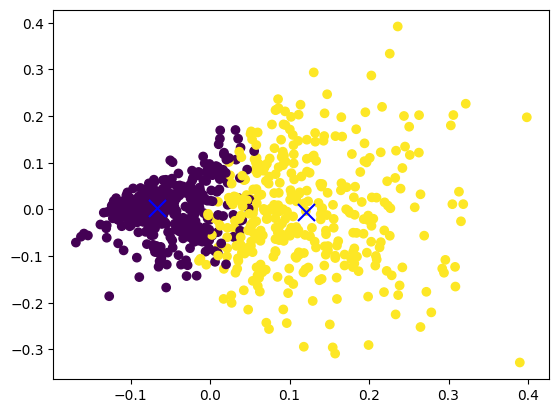

In [ ]:
plt.scatter(reduced_features[:,0],reduced_features[:,1],c=model.predict(X))
plt.scatter(reduced_cluster_centers[:,0],reduced_cluster_centers[:,1], marker='x', s=150, c='b')

### Find optimal k

#### Elbow Method

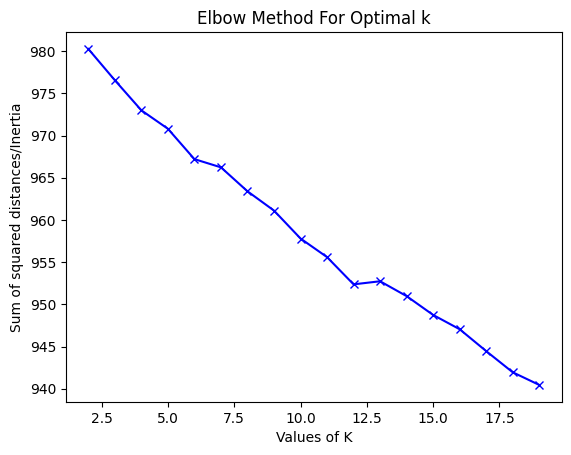

In [ ]:
# Ref: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
Sum_of_squared_distances = []
K = range(2,20)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K")
plt.ylabel("Sum of squared distances/Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

#### Silhoutte score

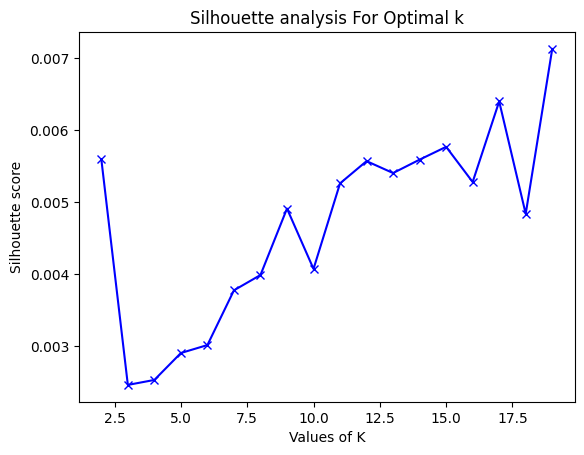

In [ ]:
# Ref https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
silhouette_avg = []
range_n_clusters = range(2,20)

for num_clusters in range_n_clusters:

  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

# DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

### Prepare dataset

In [ ]:
# Visualisasi make_moons menggunakan random sample data

X, y = make_moons(n_samples=500, noise=0.1)
df = pd.DataFrame(X,y)
df = df.rename(columns={0: "X1", 1: "X2"})
df.head()

,X1,X2
1,1.956450,0.179768
0,-0.539050,0.680459
0,-0.585498,0.999201
0,-0.672796,0.728242
0,0.742713,0.086586


### Model Training

Text(0, 0.5, '$x_2$')

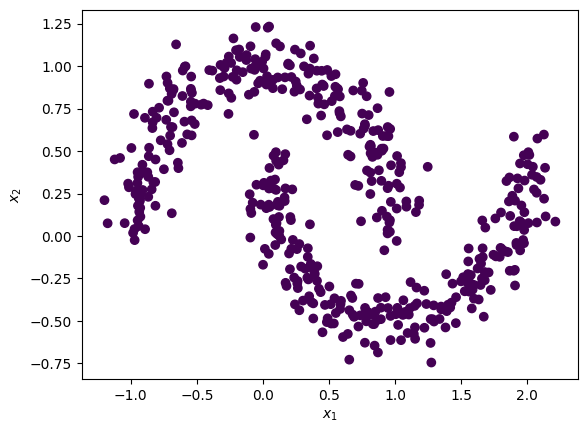

In [ ]:
# DBSCAN

dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

plt.scatter(X[:,0],
            X[:,1],
            c=dbscan_cluster1.labels_,
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
labels = dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print("Estimated no. of cluster: %d" % N_clus)

n_noise = list(dbscan_cluster1.labels_).count(-1)
print("Estimated no. of noise points: %d" % n_noise)

print("v_measure =", v_measure_score(y, labels))

Estimated no. of cluster: 1
Estimated no. of noise points: 0
v_measure = 0.0


Estimated no. of cluster: 13
Estimated no. of noise points: 115
v_measure = 0.3492946188079793


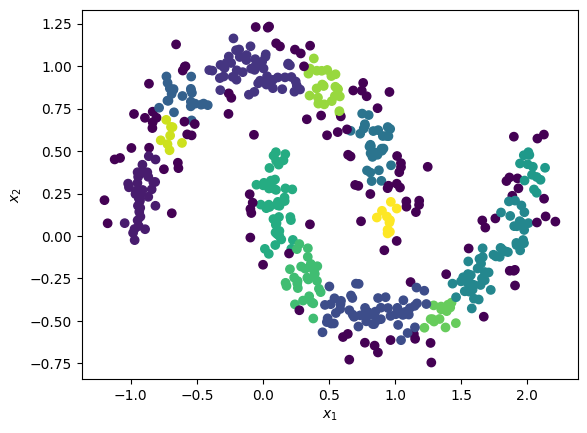

In [ ]:
# DBSCAN with epsilon = 0.1 and min_samples = 8

dbscan_cluster1 = DBSCAN(eps = 0.1, min_samples = 8)
dbscan_cluster1.fit(X)

plt.scatter(X[:,0],
            X[:,1],
            c=dbscan_cluster1.labels_,
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

labels = dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print("Estimated no. of cluster: %d" % N_clus)

n_noise = list(dbscan_cluster1.labels_).count(-1)
print("Estimated no. of noise points: %d" % n_noise)

print("v_measure =", v_measure_score(y, labels))

### Mencari nilai optimum untuk epsilon

Text(0, 0.5, 'Distances')

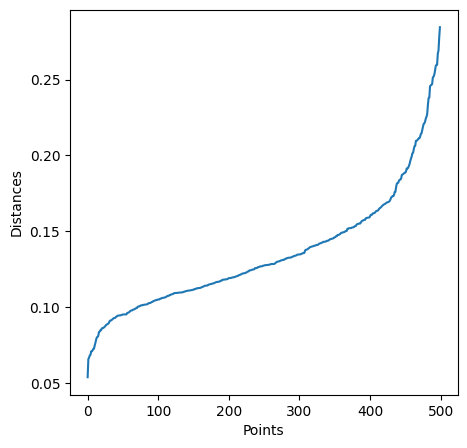

In [ ]:
# K = MinPTs atau min_sample, dalam contoh ini kita masukkan 8
# Distance = jarak rata-rata antara tiap titik dan k nearest neighbors dihitung. Distance paling optimum akan ditetapkan menjadi epsilon.
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:, 10], axis = 0)

fig = plt.figure(figsize=(5,5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distances")

0.16489562768834723


<Figure size 500x500 with 0 Axes>

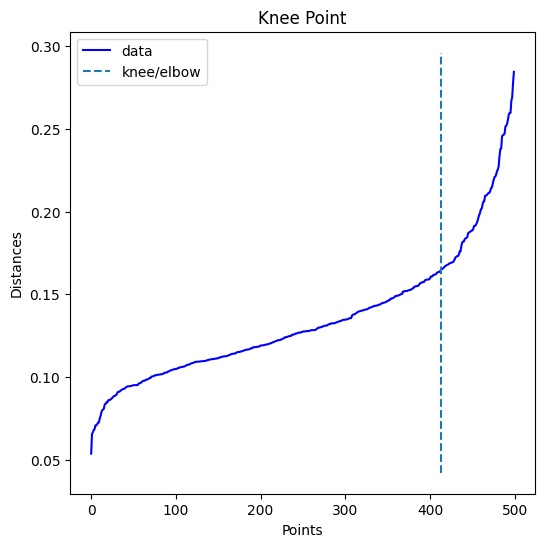

In [ ]:
# ! pip install kneed
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5,5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distances")

print(distances[knee.knee])

Estimated no. of cluster: 2
Estimated no. of noise points: 4
v_measure = 0.9649426900448599


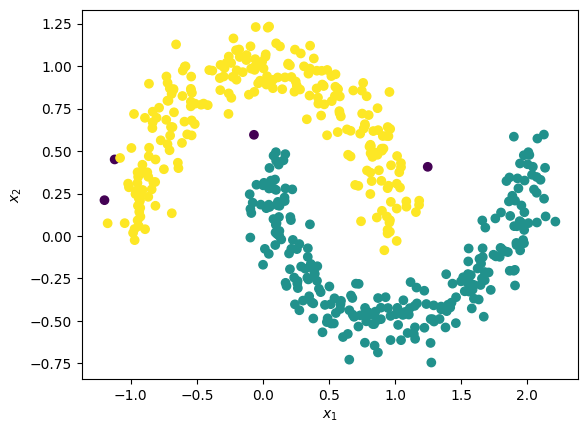

In [ ]:
# DBSCAN with epsilon = 0.16 and min_samples = 8

dbscan_cluster1 = DBSCAN(eps = 0.16, min_samples = 8)
dbscan_cluster1.fit(X)

plt.scatter(X[:,0],
            X[:,1],
            c=dbscan_cluster1.labels_,
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

labels = dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print("Estimated no. of cluster: %d" % N_clus)

n_noise = list(dbscan_cluster1.labels_).count(-1)
print("Estimated no. of noise points: %d" % n_noise)

print("v_measure =", v_measure_score(y, labels))